# Used Car Price Prediction

## Project Description
We are using the pre-processed data from a previous case study on predicting old car prices. You can check the data cleansing and feature selection steps from this link:<br>
https://thinkingneuron.com/car-price-prediction-case-study-in-python/.

## Importing the Libraries

In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Importing the Dataset

<font color='red'> Note:<br>
<font color='black'> The type of data is "pickle", which is very similar to csv; and after uploading it into the code; we treat the file same as csv files.


In [104]:
dataset = pd.read_pickle('/content/gdrive/MyDrive/Tutorials/CarPricesData.pkl')

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   int64  
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   int64  
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 100.9 KB


Price: The Price of the car in dollars
Age: The age of the car in months
KM: How many KMS did the car was used
HP: Horsepower of the car
MetColor: Whether the car has a metallic color or not
CC: The engine size of the car
Doors: The number of doors in the car
Weight: The weight of the car

In [106]:
dataset.describe()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,56.027178,68571.782578,1071.659930,101.491986,0.674564,1566.735192,4.032753,10720.915679
std,18.532943,37491.094553,47.688509,14.981408,0.468701,186.767122,0.952667,3608.732978
min,1.000000,1.000000,1000.000000,69.000000,0.000000,1300.000000,2.000000,4350.000000
25%,44.000000,43000.000000,1040.000000,90.000000,0.000000,1400.000000,3.000000,8450.000000
50%,61.000000,63451.000000,1070.000000,110.000000,1.000000,1600.000000,4.000000,9900.000000
75%,70.000000,87041.500000,1085.000000,110.000000,1.000000,1600.000000,5.000000,11950.000000
max,80.000000,243000.000000,1320.000000,192.000000,1.000000,2000.000000,5.000000,32500.000000


In [107]:
dataset.head(5)

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the Dataset into the Training set and Test set

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [137]:
print(X_train.shape)
print(X_test.shape)


(1148, 7)
(287, 7)


### Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scy = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)
y_train = scy.fit_transform((y_train).reshape(-1,1))
y_test = scy.transform((y_test).reshape(-1,1))

Feature scaling is important for NN and it improves the model training speed

In [139]:
X_train


array([[ 1.28970391, -0.05469575,  0.05850623, ...,  0.69237377,
         0.16663718,  1.00439291],
       [ 0.64025547,  2.29745752, -1.17576924, ...,  0.69237377,
        -1.42496094, -1.09395661],
       [-0.27979649, -0.41396171,  0.16136252, ...,  0.69237377,
         0.16663718,  1.00439291],
       ...,
       [ 1.28970391,  0.44078692, -0.04435006, ..., -1.44430658,
         0.16663718,  1.00439291],
       [-0.11743438, -0.7838667 , -0.66148779, ...,  0.69237377,
         0.16663718, -1.09395661],
       [ 0.26141054,  0.84260903, -0.04435006, ..., -1.44430658,
         0.16663718,  1.00439291]])

In [112]:
print(X_train.shape)
print(X_test.shape)

(1148, 7)
(287, 7)


## Building the ANN Regressor

### Initializing the ANN

In [114]:
CarPrice_1 = tf.keras.models.Sequential()
CarPrice_2 = tf.keras.models.Sequential()
CarPrice_3 = tf.keras.models.Sequential()

<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;"> Sequential(): In a Sequential model, you can arrange the layers of the neural network in a sequential order, one after the other.
Model=tf.keras.models.Sequential() is creating a new neural network model using the Sequential model. This model will allow us to stack layers one after another. In simpler terms, think of it as setting up a framework or a blank canvas where we can start building our neural network by adding layers one by one in a specific order.

### Adding the Input Layer

In [115]:
CarPrice_1.add(tf.keras.layers.Dense(units=7, activation='relu')) # One Large hidden layer: 7/200/1
CarPrice_2.add(tf.keras.layers.Dense(units=7, activation='relu')) # 1 hidden Layers: 7/10/1
CarPrice_3.add(tf.keras.layers.Dense(units=7, activation='relu')) # 4 hidden Layers: 7/28/21/14/7/1

<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;">layers: a tool to access the different types of layers.
The Dense layer is a standard layer in a neural network where every neuron (or "node") in the layer is connected to every neuron in the previous and following layers.
This layer will have 7 nodes, each handling a different aspect of our data.
activation='relu': The activation function helps the neuron decide if it should respond strongly or not based on its input. In this case, we're using 'relu' (which stands for Rectified Linear Unit), a common and effective activation function.

### Adding the First, Second, Third,... Hidden layers

1. CarPrice_1: 1 large hidden layer with 200 nodes




In [116]:
CarPrice_1.add(tf.keras.layers.Dense(units=200, activation='relu'))

<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;"> You're effectively building a network where each layer learns to represent the data in a more sophisticated way, using multiple neurons to extract different aspects or features from the input.
    
<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;"> Deciding the number of neurons in the hidden layers
1. If you have a small dataset, having a smaller number of neurons can help prevent overfitting
2. The best approach is often iterative: build a model, evaluate its performance, adjust the architecture, and repeat until you find a satisfying balance between model complexity and performance.
    


2. CarPrice_2: 1 hidden layer as described in the lecture

In [117]:
CarPrice_2.add(tf.keras.layers.Dense(units=10, activation='relu'))

3. CarPrice_3: 4 hidden layers

In [118]:
CarPrice_3.add(tf.keras.layers.Dense(units=28, activation='relu'))
CarPrice_3.add(tf.keras.layers.Dense(units=21, activation='relu'))
CarPrice_3.add(tf.keras.layers.Dense(units=14, activation='relu'))
CarPrice_3.add(tf.keras.layers.Dense(units=7, activation='relu'))

### Adding the Output Layer
Remember that in ANN Regression, our output is just one number, so, units=1.

In [119]:
CarPrice_1.add(tf.keras.layers.Dense(units=1))
CarPrice_2.add(tf.keras.layers.Dense(units=1))
CarPrice_3.add(tf.keras.layers.Dense(units=1))

### Compiling the ANN

In [120]:
CarPrice_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
CarPrice_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
CarPrice_3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;"> setting up the rules for how the model will learn. The optimizer (in this case, 'adam') decides how to adjust the internal settings (weights) of the model based on the loss (how wrong the predictions are) to get better and better over time. The loss function helps the model understand how well it's doing during training.<br>

## Training the ANN

In [121]:
h1 = CarPrice_1.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 300,verbose=0)
h2 = CarPrice_2.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 300,verbose=0)
h3 = CarPrice_3.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 300,verbose=0)

<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;"> telling the model to learn from the training data. The model will make predictions, compare them to the correct answers, and adjust itself to get better.<br>

1. batch_size=32: During training, the data is usually divided into smaller subsets called batches. The batch size defines how many samples are used in each training iteration to update the model's weights. When all the rows are passed in the batches of 20 rows each as specified in this parameter, then we call that 1-epoch.

2. epochs=300: An epoch is one pass through the entire training dataset. Setting epochs to 300 means the model will go through the entire dataset 300 times during training.

3. verbose=0: This controls the level of output shown during training. Here, verbose=0 means no output will be shown during training. Other values for verbose (e.g., 1 or 2) provide more detailed progress information.
    
<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;"> The model will go through 300 training cycles (epochs), improving its understanding of the data and gradually getting better at making predictions. The History variable stores the training history, which includes information about how the model's performance (e.g., loss ) changes over each epoch.
    
<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;"> Choosing the appropriate batch size is important for efficient training of your neural network. The batch size impacts both the speed of training and the quality of the model. <br>

Larger batch sizes generally lead to faster training times because you process more samples in parallel.
Smaller batch sizes mean more frequent updates to the model's weights, which can slow down training.<br>

**Batch Size as Power of 2:**    
Regarding the choice of numbers like 32, 64, 128, etc. for batch size, these are often used because they align well with the underlying hardware, particularly GPUs. GPUs are highly parallel and work efficiently with power-of-2 batch sizes (e.g., 32, 64, 128). Power-of-2 batch sizes are typically more efficient for memory access and computation.

In practice, start with common batch sizes like 32 or 64 and then experiment with different values to see how it affects your model's performance. The ideal batch size can vary based on your specific problem, dataset, and hardware.

In [122]:
print(h1.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


**Plotting Learning Curves**

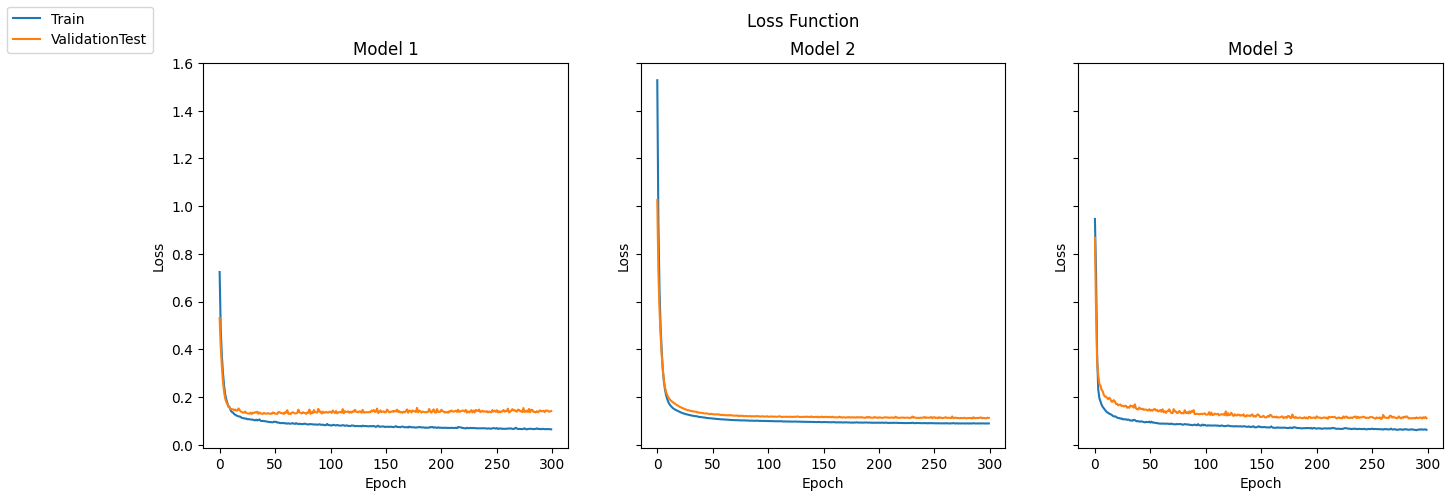

In [141]:
from matplotlib import legend
h = [h1, h2, h3]
fig, axs = plt.subplots(1,3, sharex=True, sharey=True, figsize = (16,5))
fig.suptitle('Loss Function')
for i in range(3):
  axs[i].plot(h[i].history['loss'])
  axs[i].plot(h[i].history['val_loss'])
  axs[i].set_title("Model {}".format(i + 1))

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')

fig.legend(labels=['Train','ValidationTest'], loc="upper left")
plt.show()

<span style="color: red; font-size: 40px;"> ! <span style="font-family: 'Ink Free'; font-size: 16px; color: blue;"> The line plot will show how the loss (how wrong the predictions are) of your model changes with each epoch during training, providing insights into how well the model is learning.
“Loss” measures how well the model is doing in terms of minimizing the error.
A good fit is when a training and validation loss decrease to a point of stability with a minimal gap between the loss values.

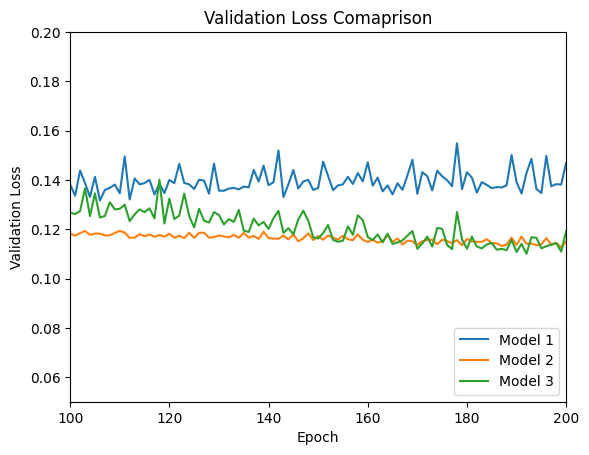

In [124]:
for i in range(3):
  plt.plot(h[i].history['val_loss'])

plt.title('Validation Loss Comaprison')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.xlim(100, 200)
plt.ylim(0.05, 0.2)
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc='lower right')
plt.show()

## Evaluating the Model

### Prediction on the Test Set

9/9 [==============================] - 0s 2ms/step


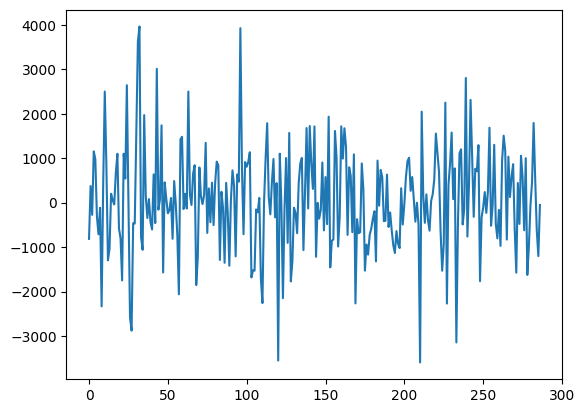

In [125]:
y_pred_1 = CarPrice_1.predict(X_test)
# remember that these are scaled numbers; you can inverse them back:
PredictedPrice_1=scy.inverse_transform(y_pred_1)
# The actual price:
ActualPrice=scy.inverse_transform(y_test)

# Let's call the differenc between Predicted and Actual price, Error:
Error_1 = PredictedPrice_1-ActualPrice

import matplotlib.pyplot as plt
plt.plot(range(len(Error_1)), Error_1)

In [126]:
# Model 2
y_pred_2 = CarPrice_2.predict(X_test)
PredictedPrice_2=scy.inverse_transform(y_pred_2)
Error_2 = PredictedPrice_2 - ActualPrice
# Model 3
y_pred_3 = CarPrice_3.predict(X_test)
PredictedPrice_3=scy.inverse_transform(y_pred_3)
Error_3 = PredictedPrice_3 - ActualPrice

9/9 [==============================] - 0s 1ms/step


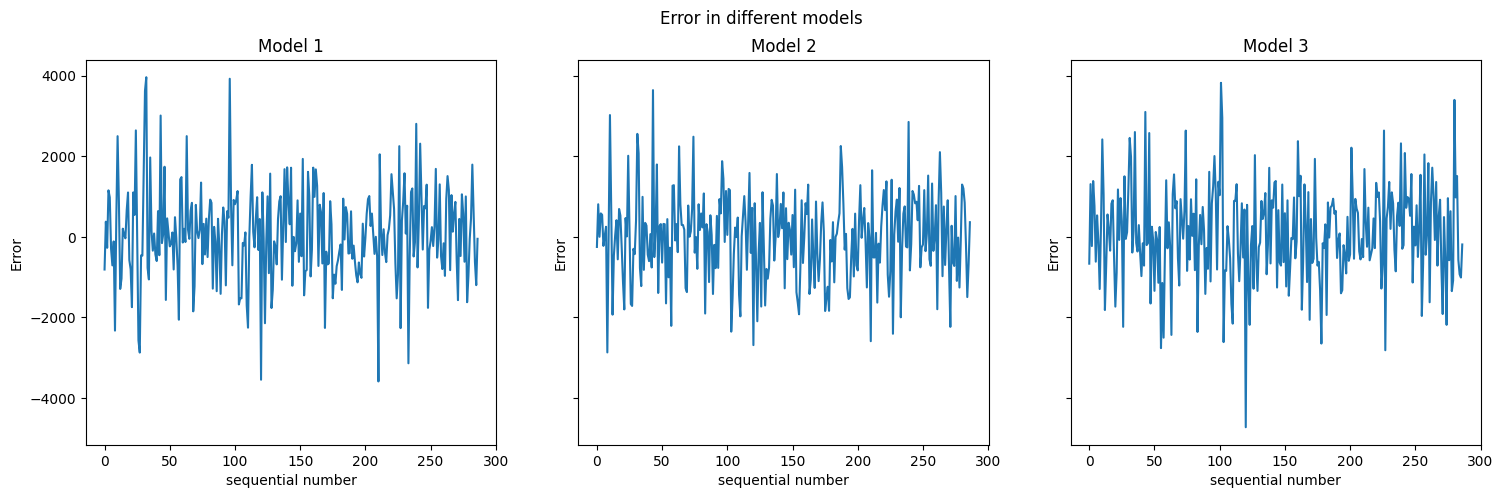

In [127]:
# Plot all 3
Error = [Error_1, Error_2, Error_3]
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error in different models')
for i in range(3):
  axs[i].plot(range(len(Error[i])), Error[i])
  axs[i].set_title('Model {}'.format(i+1))

for ax in axs.flat:
    ax.set(xlabel='sequential number', ylabel='Error')

### Checking the Model Accuracy

0.888122170385969
0.9024209226418834
0.8712600503859934
The avergae error is $ [872.96749782 834.1229448  942.6875034 ]
The std in error is $ [741.5816792  661.93529286 742.28508448]


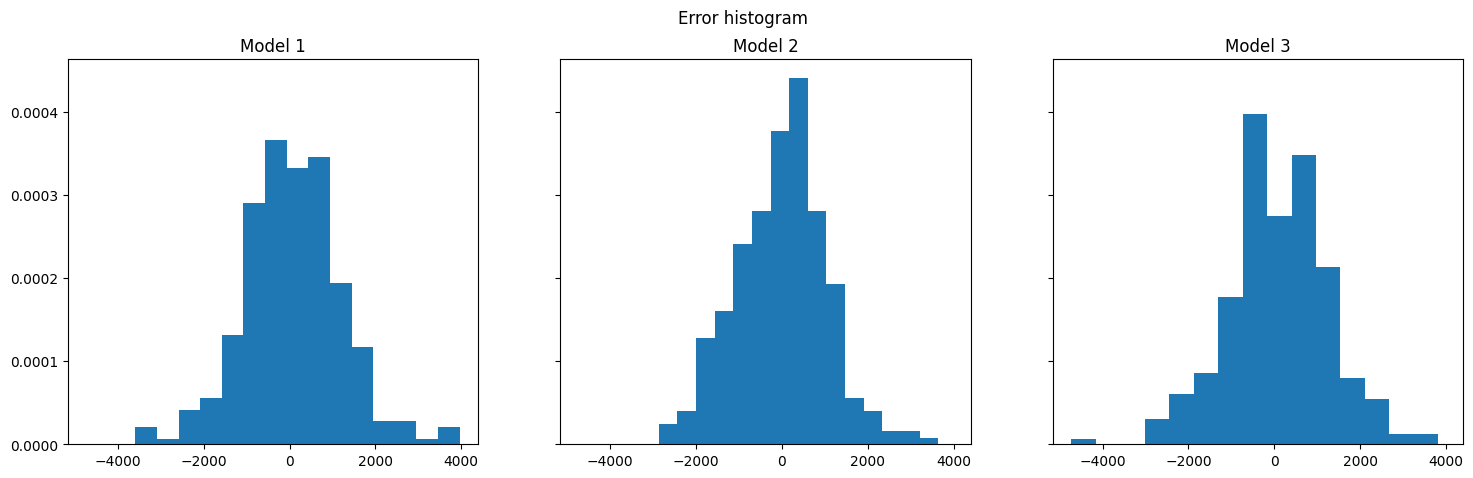

In [128]:
from sklearn.metrics import r2_score
print(r2_score(PredictedPrice_1,ActualPrice))
print(r2_score(PredictedPrice_2,ActualPrice))
print(r2_score(PredictedPrice_3,ActualPrice))


error_mean = np.zeros(3)
error_std = np.zeros(3)
for i in range(3):
  error_mean[i] = np.average(abs(Error[i]))
  error_std[i] = np.std(np.abs(Error[i]))


#AverageError= np.average(Error_6)
#print('The avergae error is $',AverageError)
print('The avergae error is $',error_mean)
print('The std in error is $',error_std)


fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error histogram')
for i in range(3):
  axs[i].hist(Error[i], 15, density=True)
  axs[i].set_title('Model {}'.format(i+1))

#n, bins, patches = plt.hist(Error_1, 15, density=True, facecolor='g', alpha=0.75)
plt.show()

# Predicting a car price

In [129]:
# You must Scaled it
my_car = scx.transform(np.array([[23.0,46986,1165.0,90,1,2000.0,3]]))
pred_val = np.zeros(3)
models = [CarPrice_1, CarPrice_2, CarPrice_3]
for i in range(3):
  # You must Scaled it back
  pred_val[i] = scy.inverse_transform(models[i].predict(my_car))

#PredictPrice=CarPrice.predict(sc.transform(np.array([[23.0,46986,1165.0,90,1,2000.0,3]])))
# Wait! You must Scaled it back
#PredictPrice=sc_y.inverse_transform(PredictPrice)
print('My car is worth $', pred_val, 'in Model 1, 2, and 3, respectively')

1/1 [==============================] - 0s 18ms/step
My car is worth $ [13565.94824219 16208.01757812 14547.46484375] in Model 1, 2, and 3, respectively


In [130]:
# Change the Age of the car and see if the predicted price makes sense..
PredictPrice=CarPrice_1.predict(scx.transform(np.array([[3.0,46986,1165.0,90,1,2000.0,3]])))
# Wait! You must Scaled it back
PredictPrice=scy.inverse_transform(PredictPrice)
print('My friend your car is worth $',PredictPrice, 'in Model 1')

1/1 [==============================] - 0s 19ms/step
My friend your car is worth $ [[15757.536]] in Model 1


# Regression Model

In [131]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_reg)
print('R2 Score = %.3f' %score)

R2 Score = 0.895


In [132]:
reg_pred = scy.inverse_transform(reg_model.predict(my_car))
print('Regression prediction of my car price is $', reg_pred)

Regression prediction of my car price is $ [[16381.39048715]]


# Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=30)
rf.fit(X_train,y_train.ravel())
y_pred_rf = rf.predict(X_test)
rf_score = r2_score(y_test,y_pred_rf)
print('R2 Score = %.3f' %rf_score)

R2 Score = 0.892


In [134]:
rf_pred = scy.inverse_transform(rf.predict(my_car).reshape(-1, 1))
print('Regression prediction of my car price is $', rf_pred)

Regression prediction of my car price is $ [[14685.]]


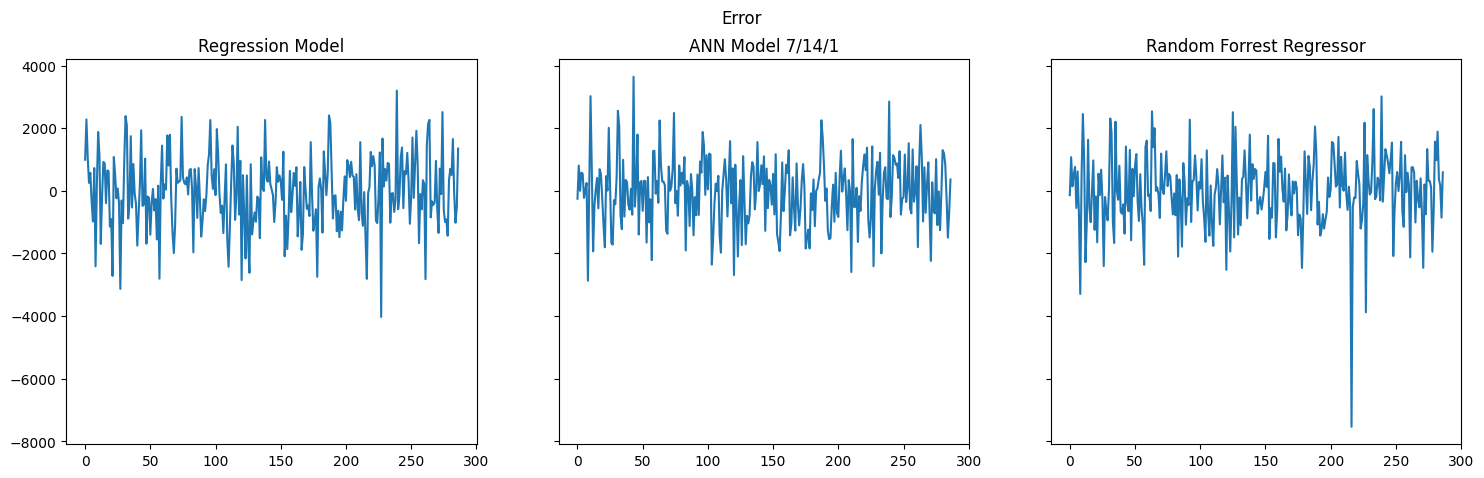

In [135]:
PredictedPrice_reg=scy.inverse_transform(y_pred_reg)
Error_reg = PredictedPrice_reg-ActualPrice
PredictedPrice_rf = scy.inverse_transform(y_pred_rf.reshape(-1, 1))
Error_rf = PredictedPrice_rf-ActualPrice

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error')
axs[0].plot(range(len(Error_reg)), Error_reg)
axs[0].set_title('Regression Model')
axs[1].plot(range(len(Error_2)), Error_2)
axs[1].set_title('ANN Model 7/14/1')
axs[2].plot(range(len(Error_rf)), Error_rf)
axs[2].set_title('Random Forrest Regressor')

plt.show()